1) Crie um jupyter notebook com os imports necessários e um código para gerar os
gráficos referentes a base de dados de março, abril, maio, junho e dezembro
(numa célula só ou em varias)

2) Como que você poderia fazer para deixar isso mais automatizado? Descreva na
última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos
pros meses/anos seguintes.



In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()  


In [57]:
sinasc = pd.read_csv('./input/SINASC_RO_2019_DEZ.csv')
sinasc.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0


In [58]:
sinasc.DTNASC.value_counts()

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: count, Length: 365, dtype: int64

In [59]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   27028 non-null  int64  
 1   SEXO       27024 non-null  object 
 2   APGAR1     26932 non-null  float64
 3   APGAR5     26925 non-null  float64
 4   PESO       27028 non-null  int64  
 5   CONSULTAS  27028 non-null  int64  
 6   DTNASC     27028 non-null  object 
 7   GESTACAO   25796 non-null  object 
 8   GRAVIDEZ   26949 non-null  object 
 9   ESCMAE     26716 non-null  object 
 10  IDADEPAI   7607 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.3+ MB


In [61]:
# Convertendo a coluna DTNASC em date
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])
# Criando colunas mes e ano
sinasc['MES']    = sinasc.DTNASC.dt.month
sinasc['ANO']    = sinasc.DTNASC.dt.year
sinasc['MES_ANO']= sinasc['MES'].astype(str) + '-' + sinasc['ANO'].astype(str) 


In [62]:
sinasc.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI,MES,ANO,MES_ANO
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0,2,2019,2-2019
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0,2,2019,2-2019
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0,2,2019,2-2019
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0,3,2019,3-2019
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0,3,2019,3-2019


In [63]:
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':# Opção de gráfico de linha simples sem agregações
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort': # Opção de gráfico de linha com ordenação especifica
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack': # Opção de grafico de linha com o eixo y contendo variaveis especificas
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

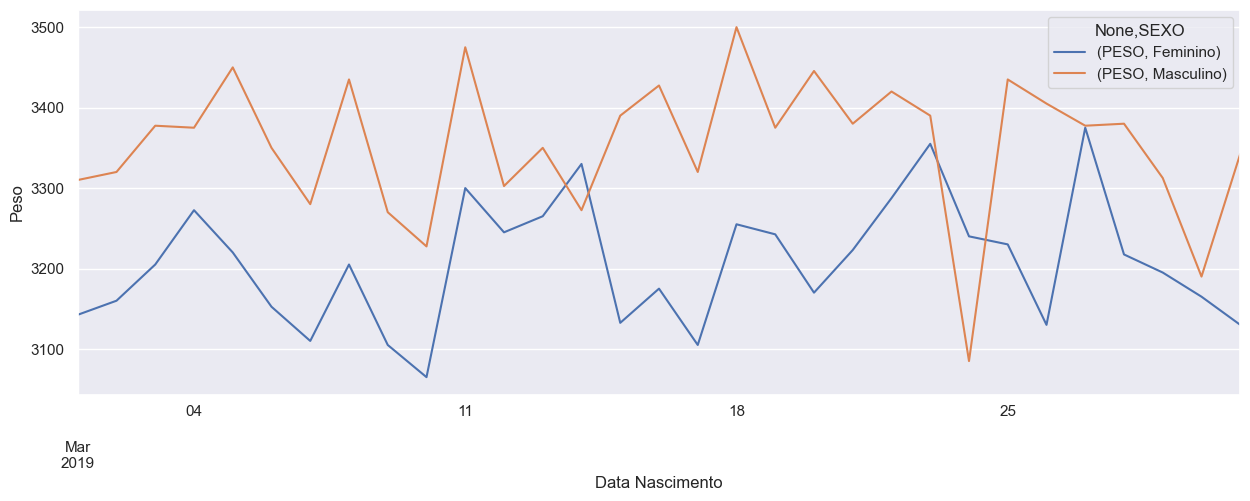

In [86]:
# Mês de Março
nomepasta = '3-2019'
os.makedirs('./output/figs/'+nomepasta, exist_ok=True)

plota_pivot_table(sinasc[sinasc['MES'] == 3], 'PESO', ['DTNASC', 'SEXO'], 'median', 'Peso','Data Nascimento', 'unstack')

plt.savefig('./output/figs/'+nomepasta+'/media peso bebe por sexo.png')


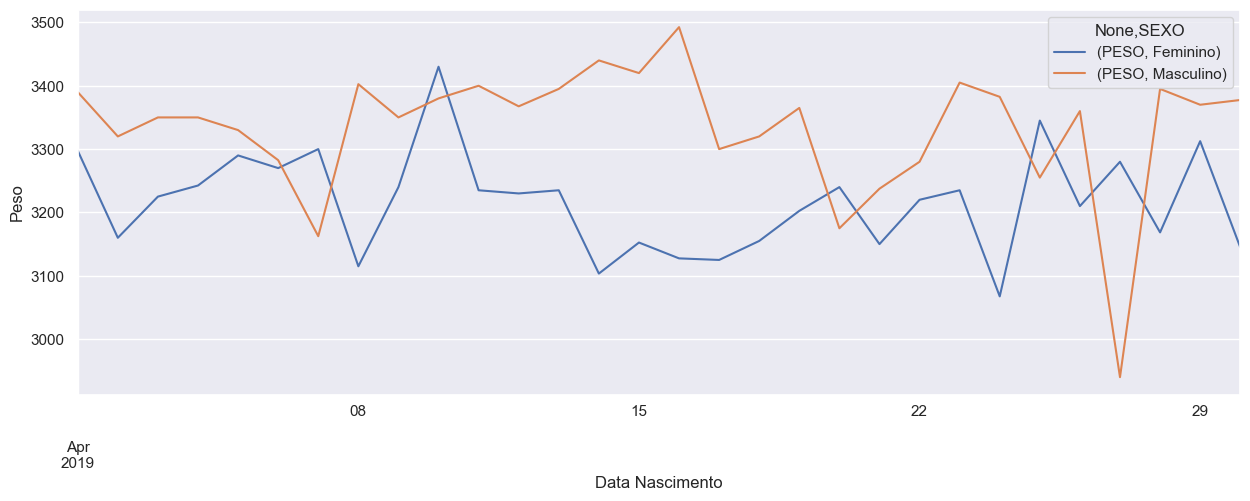

In [85]:
# Mês de Abril
nomepasta = '4-2019'
os.makedirs('./output/figs/'+nomepasta, exist_ok=True)

plota_pivot_table(sinasc[sinasc['MES'] == 4], 'PESO', ['DTNASC', 'SEXO'], 'median', 'Peso','Data Nascimento', 'unstack')

plt.savefig('./output/figs/'+nomepasta+'/media peso bebe por sexo.png')


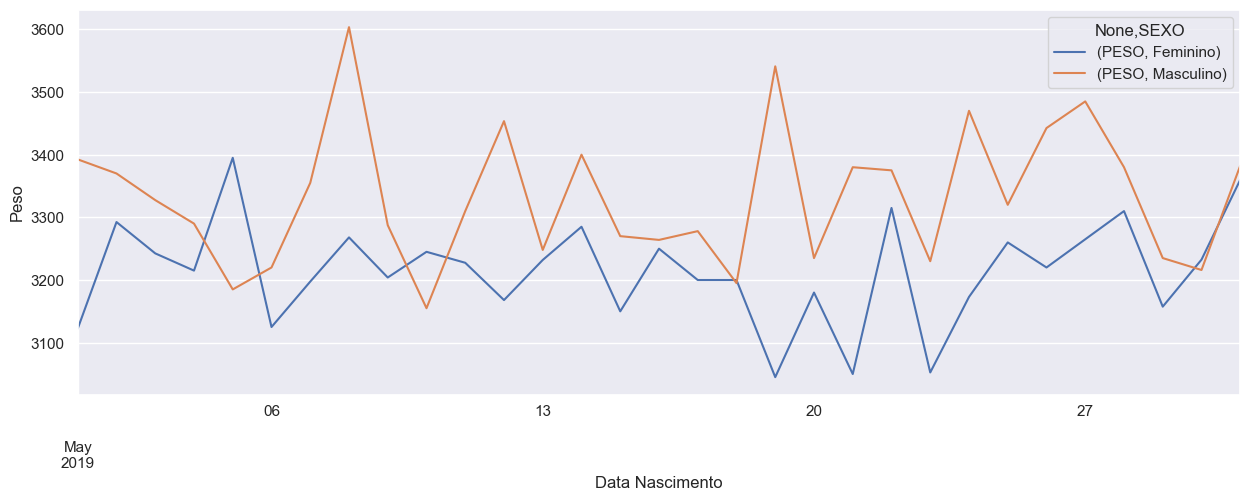

In [84]:
# Mês de Maio
nomepasta = '5-2019'
os.makedirs('./output/figs/'+nomepasta, exist_ok=True)

plota_pivot_table(sinasc[sinasc['MES'] == 5], 'PESO', ['DTNASC', 'SEXO'], 'median', 'Peso','Data Nascimento', 'unstack')

plt.savefig('./output/figs/'+nomepasta+'/media peso bebe por sexo.png')


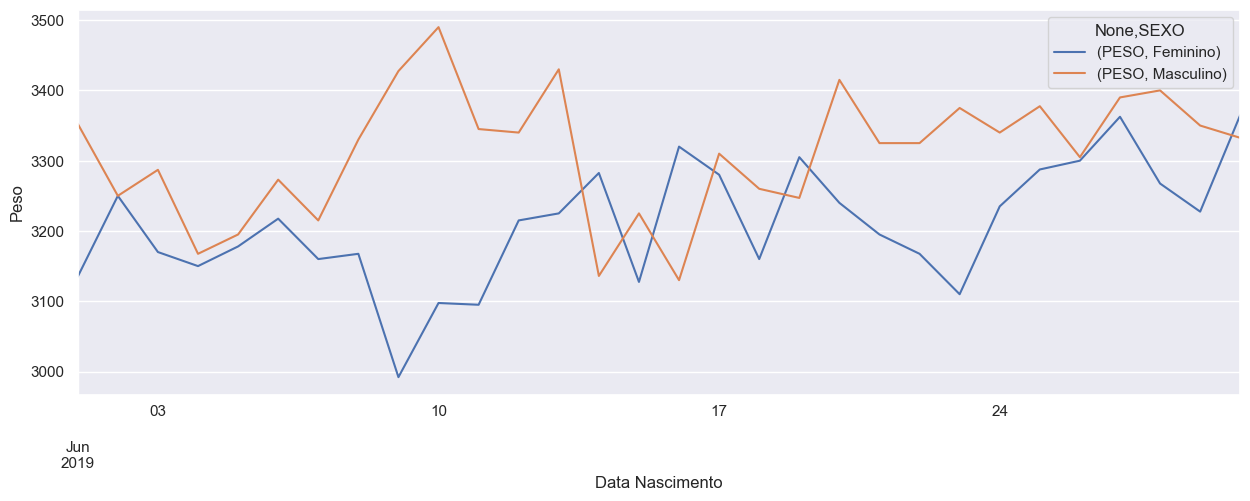

In [83]:
# Mês de Junho
nomepasta = '6-2019'
os.makedirs('./output/figs/'+nomepasta, exist_ok=True)

plota_pivot_table(sinasc[sinasc['MES'] == 6], 'PESO', ['DTNASC', 'SEXO'], 'median', 'Peso','Data Nascimento', 'unstack')

plt.savefig('./output/figs/'+nomepasta+'/media peso bebe por sexo.png')


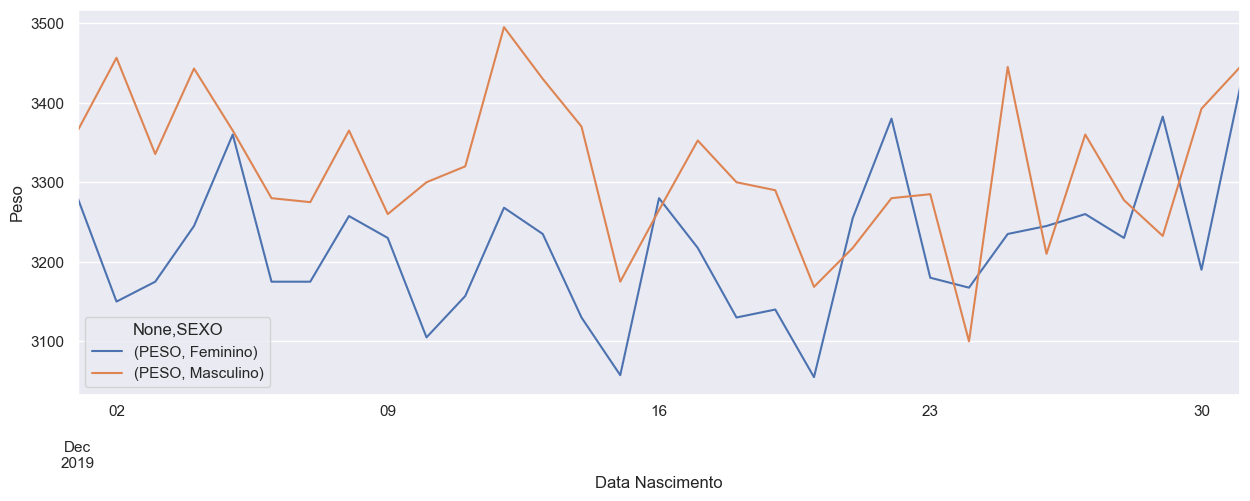

In [82]:
# Mês de Dezembro
nomepasta = '12-2019'
os.makedirs('./output/figs/'+nomepasta, exist_ok=True)

plota_pivot_table(sinasc[sinasc['MES'] == 12], 'PESO', ['DTNASC', 'SEXO'], 'median', 'Peso','Data Nascimento', 'unstack')

plt.savefig('./output/figs/'+nomepasta+'/media peso bebe por sexo.png')


* Podemos automatizar criando um for para executar os graficos dos meses anteriores ao atual. 